In [1]:
from keras.layers import Dense, Input
from keras.optimizers import adam
from keras.losses import mse, binary_crossentropy
from keras.datasets import mnist
from keras.models import Model
import keras.backend as K
from keras.models import load_model
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

/home/aidan/anaconda3/envs/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from numpy.random import seed
seed(13)
from tensorflow import set_random_seed
set_random_seed(13)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = len(set(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
def process(arr):
    arr = arr.reshape((arr.shape[0], arr.shape[1] * arr.shape[2]))
    arr = arr.astype('float32') / arr.max()
    return arr

x_train = process(x_train)
x_test = process(x_test)

In [5]:
input_shape = (x_train.shape[1], )
inter_dim = 432
latent_dim = 4
batch_size = 500
epochs = 50

In [7]:
c_input = Input(shape=input_shape)
c_h = Dense(inter_dim)(c_input)
c_h = Dense(inter_dim)(c_h)
c_l = Dense(latent_dim)(c_h)
c_o = Dense(10)(c_l)

classifier = Model(c_input, c_o)

In [8]:
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['mae', 'acc'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 432)               339120    
_________________________________________________________________
dense_6 (Dense)              (None, 432)               187056    
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 1732      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                50        
Total params: 527,958
Trainable params: 527,958
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = classifier.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 18us/step - loss: 4.5420 - mean_absolute_error: 13.8650 - acc: 0.1328 - val_loss: 3.3615 - val_mean_absolute_error: 16.4905 - val_acc: 0.1135
Epoch 2/50
60000/60000 [==============================] - 0s 7us/step - loss: 5.1297 - mean_absolute_error: 23.6970 - acc: 0.0857 - val_loss: 10.2427 - val_mean_absolute_error: 25.7765 - val_acc: 0.2059
Epoch 3/50
60000/60000 [==============================] - 0s 7us/step - loss: 5.3251 - mean_absolute_error: 41.6417 - acc: 0.1254 - val_loss: 7.3592 - val_mean_absolute_error: 46.4316 - val_acc: 0.1236
Epoch 4/50
60000/60000 [==============================] - 0s 7us/step - loss: 4.2259 - mean_absolute_error: 67.9654 - acc: 0.1271 - val_loss: 5.0248 - val_mean_absolute_error: 147.7945 - val_acc: 0.1046
Epoch 5/50
60000/60000 [==============================] - 0s 7us/step - loss: 4.8263 - mean_absolute_error: 171.6249 - acc: 0.1096 - val_lo

60000/60000 [==============================] - 0s 7us/step - loss: 11.2434 - mean_absolute_error: 564.2202 - acc: 0.1044 - val_loss: 11.2182 - val_mean_absolute_error: 576.5057 - val_acc: 0.1028
Epoch 41/50
60000/60000 [==============================] - 0s 8us/step - loss: 11.2434 - mean_absolute_error: 564.2202 - acc: 0.1044 - val_loss: 11.2182 - val_mean_absolute_error: 576.5057 - val_acc: 0.1028
Epoch 42/50
60000/60000 [==============================] - 0s 8us/step - loss: 11.2434 - mean_absolute_error: 564.2202 - acc: 0.1044 - val_loss: 11.2182 - val_mean_absolute_error: 576.5057 - val_acc: 0.1028
Epoch 43/50
60000/60000 [==============================] - 0s 7us/step - loss: 11.2434 - mean_absolute_error: 564.2202 - acc: 0.1044 - val_loss: 11.2182 - val_mean_absolute_error: 576.5057 - val_acc: 0.1028
Epoch 44/50
60000/60000 [==============================] - 0s 7us/step - loss: 11.2434 - mean_absolute_error: 564.2202 - acc: 0.1044 - val_loss: 11.2182 - val_mean_absolute_error: 576.

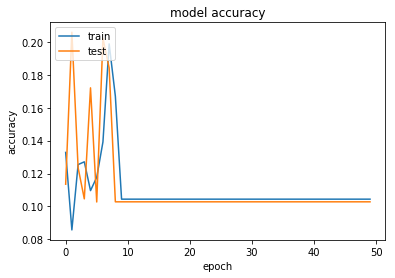

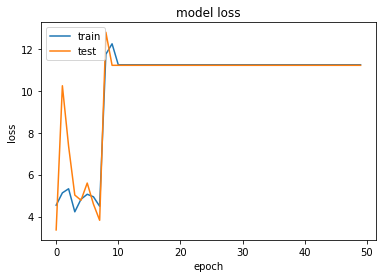

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
def predict(index):
    img = x_test[index]
    actual = list(y_test[index]).index(1)
    out = classifier.predict(img.reshape(1, img.shape[0]))[0]
    prediction = list(out).index(out.max())
    return img.reshape(28, 28), actual, prediction

In [15]:
incorrect_indexes = []
num_correct = 0
for i in range(len(x_test)):
    img, actual, prediction = predict(i)
    if actual == prediction:
        num_correct += 1
    else:
        incorrect_indexes.append(i)

In [16]:
print("Percent Correct: {}".format((num_correct/len(x_test))*100))

Percent Correct: 10.280000000000001
